In [19]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
import keras.optimizers as Optimizer

import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [2]:
DIR = os.listdir('../input/intel-image-classification/seg_train/seg_train/')
DIR

['street', 'forest', 'mountain', 'buildings', 'glacier', 'sea']

In [3]:
def get_images(directory):
    Images = []
    Labels = []
    
    label = 0
    
    for labels in os.listdir(directory):
        
        if labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'glacier':
            label = 2
        elif labels == 'mountain':
            label = 3
        elif labels == 'sea':
            label = 4
        elif labels == 'street':
            label = 5
        
        for image_file in os.listdir(directory+labels):
            image = cv2.imread(directory+labels+r'/'+image_file)
            image = cv2.resize(image,(150,150))
            
            Images.append(image)
            Labels.append(label)
        
    return shuffle(Images,Labels,random_state=817328462)
            
    

In [4]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [5]:
Images, Labels = get_images('../input/intel-image-classification/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [6]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


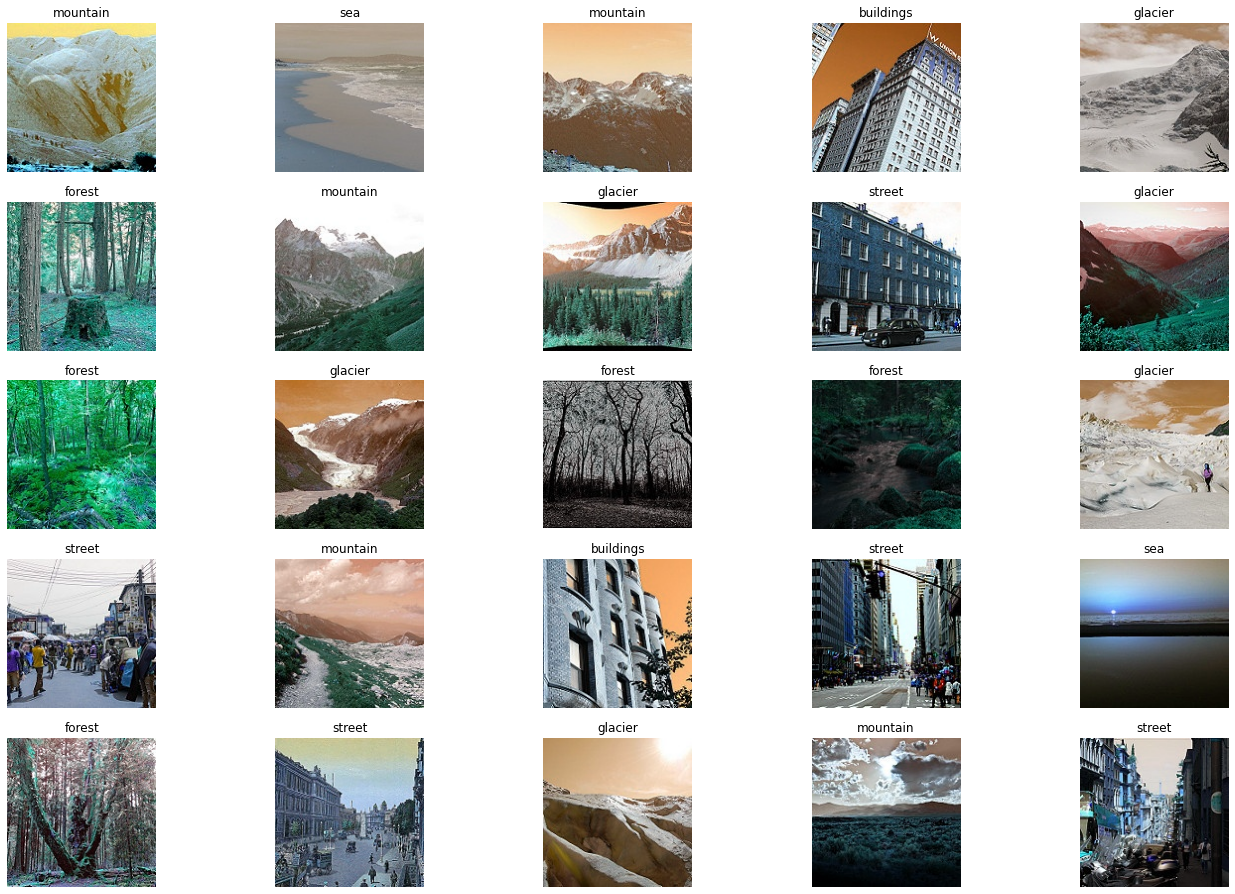

In [7]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(5,5))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(5,5))
model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation='softmax'))

In [10]:
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        4

In [12]:
train = model.fit(Images,Labels,epochs=30,validation_split=0.30)

Epoch 1/30
307/307 [==============================] - 47s 153ms/step - loss: 1.5468 - accuracy: 0.3828 - val_loss: 1.0911 - val_accuracy: 0.5609
Epoch 2/30
307/307 [==============================] - 45s 147ms/step - loss: 1.1953 - accuracy: 0.5318 - val_loss: 0.9529 - val_accuracy: 0.6459
Epoch 3/30
307/307 [==============================] - 45s 148ms/step - loss: 1.0397 - accuracy: 0.6151 - val_loss: 0.8374 - val_accuracy: 0.7005
Epoch 4/30
307/307 [==============================] - 45s 148ms/step - loss: 0.9213 - accuracy: 0.6706 - val_loss: 0.7611 - val_accuracy: 0.7260
Epoch 5/30
307/307 [==============================] - 45s 148ms/step - loss: 0.8209 - accuracy: 0.7121 - val_loss: 0.6740 - val_accuracy: 0.7547
Epoch 6/30
307/307 [==============================] - 45s 147ms/step - loss: 0.7198 - accuracy: 0.7525 - val_loss: 0.6078 - val_accuracy: 0.7782
Epoch 7/30
307/307 [==============================] - 45s 147ms/step - loss: 0.6849 - accuracy: 0.7669 - val_loss: 0.5614 - val_ac

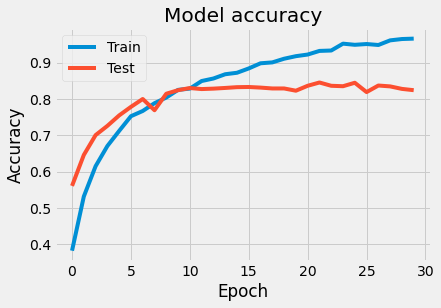

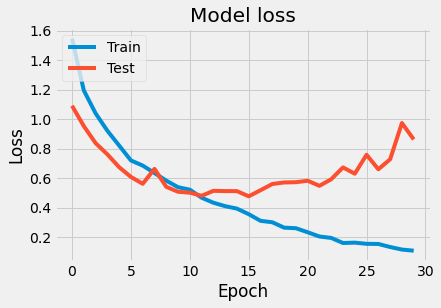

In [16]:
plot.style.use('fivethirtyeight')
plot.plot(train.history['accuracy'])
plot.plot(train.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(train.history['loss'])
plot.plot(train.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [17]:
test_images,test_labels = get_images('../input/intel-image-classification/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

94/94 [==============================] - 4s 46ms/step - loss: 0.7879 - accuracy: 0.8373


[0.7878736853599548, 0.8373333215713501]

In [23]:
pred_images,no_labels = get_images('../input/intel-image-classification/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

In [ ]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(5):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)
fig.show()